<a href="https://colab.research.google.com/github/Sanku-ctrl/Graph-Algo/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
import time
import matplotlib.pyplot as plt

In [ ]:
class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = {}  # Adjacency list representation

    def add_edge(self, u, v, weight):
        if u not in self.edges:
            self.edges[u] = []
        if v not in self.edges:
            self.edges[v] = []
        self.edges[u].append((v, weight))
        self.edges[v].append((u, weight))

def prim_mst(graph, start_node):
    if start_node not in graph.nodes:
        raise ValueError(f"Node '{start_node}' not in the graph.")

    visited = set()
    mst = []
    total_cost = 0

    visited.add(start_node)

    while len(visited) < len(graph.nodes):
        min_edge = None

        # Explore all edges connected to visited nodes
        for node in visited:
            for neighbor, weight in graph.edges[node]:
                if neighbor not in visited:
                    if min_edge is None or weight < min_edge[2]:
                        min_edge = (node, neighbor, weight)

        # Add the selected edge to MST
        if min_edge:
            u, v, weight = min_edge
            mst.append((u, v, weight))
            total_cost += weight
            visited.add(v)

    return mst, total_cost


# Sample graph input
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
edges = [
    ('A', 'B', 500),
    ('A', 'C', 400),
    ('C', 'E', 600),
    ('C', 'D', 100),
    ('B', 'E', 100),
    ('B', 'F', 200),
    ('D', 'F', 200),
    ('E', 'I', 300),
    ('H', 'E', 400),
    ('F', 'G', 150),
    ('F', 'I', 350),
    ('G', 'I', 100),
    ('G', 'J', 300),
    ('H', 'J', 100),
    ('H', 'K', 500),
    ('I', 'K', 250),
    ('J', 'K', 100)
]

# Create the graph
graph = Graph(nodes)
for u, v, weight in edges:
    graph.add_edge(u, v, weight)

# Define the source vertex
start_node = 'A'  # You can change this to any node you prefer

# Compute the MST
mst, cost = prim_mst(graph, start_node)
print("\nPrim's MST Edges:", mst)
print("Total Cost:", cost)


Prim's MST Edges: [('A', 'C', 400), ('C', 'D', 100), ('D', 'F', 200), ('F', 'G', 150), ('G', 'I', 100), ('F', 'B', 200), ('B', 'E', 100), ('I', 'K', 250), ('K', 'J', 100), ('J', 'H', 100)]
Total Cost: 1700


In [ ]:
class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

def prim_mst_with_source(graph, source):
    visited = set()
    mst = []
    total_cost = 0
    min_heap = [(0, source, None)]  # Start from the source
    while len(mst) < len(graph.nodes) - 1 and min_heap:
        weight, current, parent = heapq.heappop(min_heap)
        if current not in visited:
            visited.add(current)
            if parent:
                mst.append((parent, current, weight))
                total_cost += weight
            for w, u, v in graph.edges:
                if u == current and v not in visited:
                    heapq.heappush(min_heap, (w, v, u))
                elif v == current and u not in visited:
                    heapq.heappush(min_heap, (w, u, v))
    return mst, total_cost

# Kruskal's MST
def kruskal_mst(graph):
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    sorted_edges = sorted(graph.edges)
    mst = []
    total_cost = 0

    for weight, u, v in sorted_edges:
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, weight))
            total_cost += weight

    return mst, total_cost

# Graph input
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [
    ('A', 'B', 2),
    ('A', 'C', 3),
    ('B', 'C', 1),
    ('B', 'D', 4),
    ('C', 'D', 5),
    ('D', 'E', 6)
]

graph = Graph(nodes)
for u, v, weight in edges:
    graph.add_edge(u, v, weight)


# Measure and print time complexity
def measure_time(graph):
    # Measure Prim's MST
    start_time = time.time()
    prim_result, prim_cost = prim_mst(graph)
    prim_time = time.time() - start_time

    # Measure Kruskal's MST
    start_time = time.time()
    kruskal_result, kruskal_cost = kruskal_mst(graph)
    kruskal_time = time.time() - start_time

    print("Prim's MST:", prim_result)
    print("Total Cost (Prim's):", prim_cost)
    print("Execution Time (Prim's): {:.6f} seconds".format(prim_time))

    print("\nKruskal's MST:", kruskal_result)
    print("Total Cost (Kruskal's):", kruskal_cost)
    print("Execution Time (Kruskal's): {:.6f} seconds".format(kruskal_time))

    return prim_time, kruskal_time

prim_time, kruskal_time = measure_time(graph)

plt.show()


Prim's MST: [('A', 'B', 2), ('B', 'C', 1), ('B', 'D', 4), ('D', 'E', 6)]
Total Cost (Prim's): 13
Execution Time (Prim's): 0.000028 seconds

Kruskal's MST: [('B', 'C', 1), ('A', 'B', 2), ('B', 'D', 4), ('D', 'E', 6)]
Total Cost (Kruskal's): 13
Execution Time (Kruskal's): 0.000023 seconds


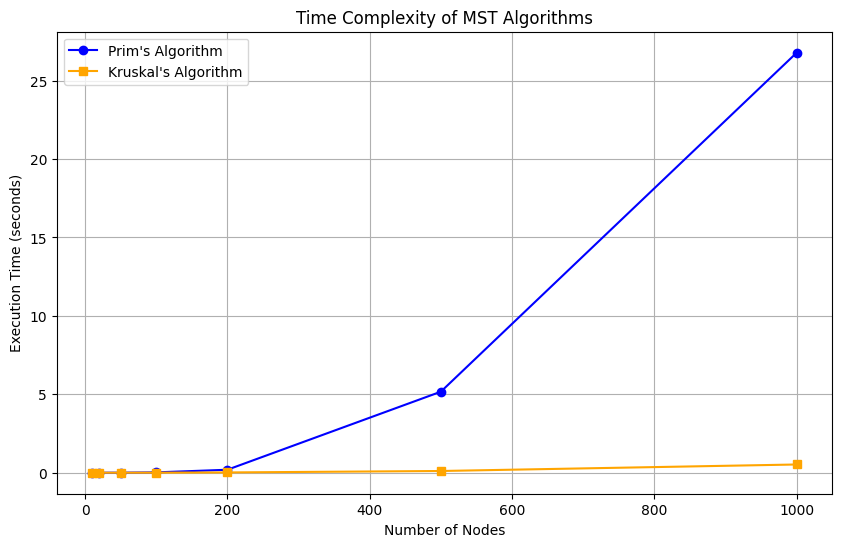

In [ ]:
import heapq
import time
import random
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

# Prim's MST
def prim_mst(graph):
    visited = set()
    mst = []
    total_cost = 0
    min_heap = [(0, graph.nodes[0], None)]
    while len(mst) < len(graph.nodes) - 1 and min_heap:
        weight, current, parent = heapq.heappop(min_heap)
        if current not in visited:
            visited.add(current)
            if parent:
                mst.append((parent, current, weight))
                total_cost += weight
            for w, u, v in graph.edges:
                if u == current and v not in visited:
                    heapq.heappush(min_heap, (w, v, u))
                elif v == current and u not in visited:
                    heapq.heappush(min_heap, (w, u, v))
    return mst, total_cost

# Kruskal's MST
def kruskal_mst(graph):
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    sorted_edges = sorted(graph.edges)
    mst = []
    total_cost = 0

    for weight, u, v in sorted_edges:
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, weight))
            total_cost += weight

    return mst, total_cost

def generate_random_graph(num_nodes, num_edges):
    nodes = [f"Node_{i}" for i in range(num_nodes)]
    edges = []
    for _ in range(num_edges):
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u != v:
            weight = random.randint(1, 100)
            edges.append((u, v, weight))
    return nodes, edges

def measure_time(graph):
    start_time = time.time()
    prim_mst(graph)
    prim_time = time.time() - start_time

    start_time = time.time()
    kruskal_mst(graph)
    kruskal_time = time.time() - start_time

    return prim_time, kruskal_time

def plot_time_complexity():
    node_sizes = [10, 20, 50, 100, 200, 500, 1000]
    prim_times = []
    kruskal_times = []

    for num_nodes in node_sizes:
        num_edges = num_nodes * (num_nodes - 1) // 4
        nodes, edges = generate_random_graph(num_nodes, num_edges)
        graph = Graph(nodes)
        for u, v, weight in edges:
            graph.add_edge(u, v, weight)

        prim_time, kruskal_time = measure_time(graph)
        prim_times.append(prim_time)
        kruskal_times.append(kruskal_time)

    plt.figure(figsize=(10, 6))
    plt.plot(node_sizes, prim_times, label="Prim's Algorithm", marker='o', color='blue')
    plt.plot(node_sizes, kruskal_times, label="Kruskal's Algorithm", marker='s', color='orange')
    plt.title("Time Complexity of MST Algorithms")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Execution Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_time_complexity()


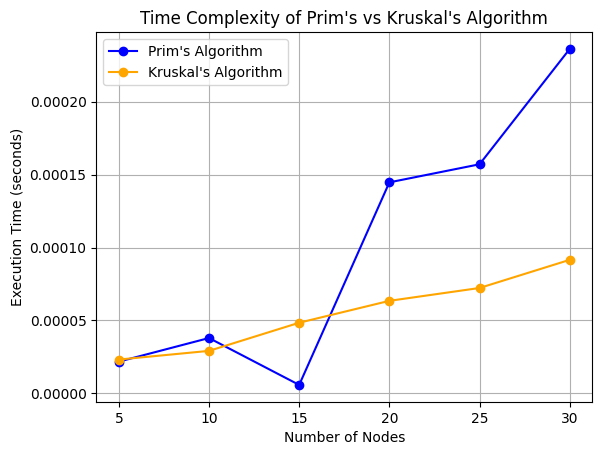

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

# Prim's MST with Source
def prim_mst_with_source(graph, source):
    visited = set()
    mst = []
    total_cost = 0
    min_heap = [(0, source, None)]  # Start from the source
    while len(mst) < len(graph.nodes) - 1 and min_heap:
        weight, current, parent = heapq.heappop(min_heap)
        if current not in visited:
            visited.add(current)
            if parent:
                mst.append((parent, current, weight))
                total_cost += weight
            for w, u, v in graph.edges:
                if u == current and v not in visited:
                    heapq.heappush(min_heap, (w, v, u))
                elif v == current and u not in visited:
                    heapq.heappush(min_heap, (w, u, v))
    return mst, total_cost

# Kruskal's MST
def kruskal_mst(graph):
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    sorted_edges = sorted(graph.edges)
    mst = []
    total_cost = 0

    for weight, u, v in sorted_edges:
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, weight))
            total_cost += weight

    return mst, total_cost

# Function to generate a random graph
def generate_random_graph(num_nodes, num_edges):
    nodes = [chr(i) for i in range(65, 65 + num_nodes)]
    graph = Graph(nodes)

    edges_added = set()
    while len(graph.edges) < num_edges:
        u, v = random.sample(nodes, 2)
        weight = random.randint(1, 10)
        if (u, v) not in edges_added and (v, u) not in edges_added:
            graph.add_edge(u, v, weight)
            edges_added.add((u, v))
    return graph

# Measure and record the time complexity
def measure_time_for_graph_sizes(graph_sizes):
    prim_times = []
    kruskal_times = []

    for nodes, edges in graph_sizes:
        graph = generate_random_graph(nodes, edges)
        source = graph.nodes[0]  # Taking the first node as source

        # Measure Prim's MST with Source
        start_time = time.time()
        prim_mst_with_source(graph, source)
        prim_times.append(time.time() - start_time)

        # Measure Kruskal's MST
        start_time = time.time()
        kruskal_mst(graph)
        kruskal_times.append(time.time() - start_time)

    return prim_times, kruskal_times

# Graph sizes to test (number of nodes, number of edges)
graph_sizes = [(5, 10), (10, 20), (15, 30), (20, 40), (25, 50), (30, 60)]

# Measure time for each graph size
prim_times, kruskal_times = measure_time_for_graph_sizes(graph_sizes)

# Extract nodes for the x-axis (number of nodes)
num_nodes = [size[0] for size in graph_sizes]

# Plot the time complexities
plt.plot(num_nodes, prim_times, label="Prim's Algorithm", color='blue', marker='o')
plt.plot(num_nodes, kruskal_times, label="Kruskal's Algorithm", color='orange', marker='o')

plt.title("Time Complexity of Prim's vs Kruskal's Algorithm")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

#prims
def prim_mst_with_source(graph, source):
    visited = set()
    mst = []
    total_cost = 0
    min_heap = [(0, source, None)]
    while len(mst) < len(graph.nodes) - 1 and min_heap:
        weight, current, parent = heapq.heappop(min_heap)
        if current not in visited:
            visited.add(current)
            if parent:
                mst.append((parent, current, weight))
                total_cost += weight
            for w, u, v in graph.edges:
                if u == current and v not in visited:
                    heapq.heappush(min_heap, (w, v, u))
                elif v == current and u not in visited:
                    heapq.heappush(min_heap, (w, u, v))
    return mst, total_cost

#kruskals
def kruskal_mst(graph):
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    sorted_edges = sorted(graph.edges)
    mst = []
    total_cost = 0

    for weight, u, v in sorted_edges:
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, weight))
            total_cost += weight

    return mst, total_cost

# Function to generate a random graph
def generate_random_graph(num_nodes, num_edges):
    nodes = [chr(i) for i in range(65, 65 + num_nodes)]
    graph = Graph(nodes)

    edges_added = set()
    while len(graph.edges) < num_edges:
        u, v = random.sample(nodes, 2)
        weight = random.randint(1, 10)
        if (u, v) not in edges_added and (v, u) not in edges_added:
            graph.add_edge(u, v, weight)
            edges_added.add((u, v))
    return graph

# Measure and record the time complexity
def measure_time_for_graph_sizes(graph_sizes):
    prim_times = []
    kruskal_times = []

    for nodes, edges in graph_sizes:
        graph = generate_random_graph(nodes, edges)
        source = graph.nodes[0]  # Taking the first node as source

        # Measure Prim's MST with Source
        start_time = time.time()
        prim_mst_with_source(graph, source)
        prim_times.append(time.time() - start_time)

        # Measure Kruskal's MST
        start_time = time.time()
        kruskal_mst(graph)
        kruskal_times.append(time.time() - start_time)

    return prim_times, kruskal_times

# Graph sizes to test (number of nodes, number of edges)
graph_sizes = [(5, 10), (10, 20), (15, 30), (20, 40), (25, 50), (30, 60)]

# Measure time for each graph size
prim_times, kruskal_times = measure_time_for_graph_sizes(graph_sizes)

# Extract nodes for the x-axis (number of nodes)
num_nodes = [size[0] for size in graph_sizes]

# Plot the time complexities
plt.plot(num_nodes, prim_times, label="Prim's Algorithm", color='blue', marker='o')
plt.plot(num_nodes, kruskal_times, label="Kruskal's Algorithm", color='orange', marker='o')

plt.title("Time Complexity of Prim's vs Kruskal's Algorithm")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
class Graph:
    def __init__(self, nodes):
        self.nodes = nodes
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

def prim_mst(graph):
    source = 'A'
    visited = set()
    mst = []
    total_cost = 0
    visited.add(source)

    while len(mst) < len(graph.nodes) - 1:
        min_edge = (float('inf'), None, None)
        for weight, u, v in graph.edges:
            if u in visited and v not in visited:
                if weight < min_edge[0]:
                    min_edge = (weight, u, v)
            elif v in visited and u not in visited:
                if weight < min_edge[0]:
                    min_edge = (weight, v, u)

        if min_edge[1] is None or min_edge[2] is None:
            break

        weight, u, v = min_edge
        mst.append((u, v, weight))
        total_cost += weight
        visited.add(v)

    return mst, total_cost

def kruskal_mst(graph):
    # Sort edges by weight
    sorted_edges = sorted(graph.edges)

    # Dictionary to track connected components
    components = {}

    # Initialize each node as its own component
    for node in graph.nodes:
        components[node] = {node}

    # List to store MST edges
    mst = []
    total_cost = 0

    for weight, u, v in sorted_edges:
        # Find the components of u and v
        u_component = None
        v_component = None

        for comp_key, comp_set in list(components.items()):
            if u in comp_set:
                u_component = comp_key
            if v in comp_set:
                v_component = comp_key

        # If nodes are in different components, merge them
        if u_component != v_component:
            # Add edge to MST
            mst.append((u, v, weight))
            total_cost += weight

            # Merge components
            if u_component and v_component:
                # Merge the smaller component into the larger one
                if len(components[u_component]) < len(components[v_component]):
                    u_component, v_component = v_component, u_component

                # Move all nodes from v's component to u's component
                for node in list(components[v_component]):
                    components[u_component].add(node)

                # Remove the old component
                del components[v_component]

    return mst, total_cost

# Graph input
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
edges = [
    ('A', 'B', 500),
    ('A', 'C', 400),
    ('B', 'E', 100),
    ('B', 'F', 200),
    ('C', 'E', 50),
    ('C', 'D', 100),
    ('D', 'F', 200),
    ('E', 'I', 300),
    ('E', 'H', 400),
    ('F', 'G', 150),
    ('F', 'I', 350),
    ('G', 'I', 100),
    ('G', 'J', 300),
    ('H', 'J', 100),
    ('H', 'K', 500),
    ('K', 'I', 250),
    ('J', 'K', 100)
]
graph = Graph(nodes)
for u, v, weight in edges:
    graph.add_edge(u, v, weight)

# Run Prim's algorithm
mst_edges, total_cost = prim_mst(graph)

print("Edges in the Minimum Spanning Tree (Prim's):")
for u, v, weight in mst_edges:
    print(f"{u} -- {v} = {weight}")

print(f"Total cost of MST (Prim's): {total_cost}")

# Run Kruskal's algorithm
mst_edges_kruskal, total_cost_kruskal = kruskal_mst(graph)

print("\nEdges in the Minimum Spanning Tree (Kruskal's):")
for u, v, weight in mst_edges_kruskal:
    print(f"{u} -- {v} == {weight}")

print(f"Total cost of MST (Kruskal's): {total_cost_kruskal}")

Edges in the Minimum Spanning Tree (Prim's):
A -- C = 400
C -- E = 50
E -- B = 100
C -- D = 100
B -- F = 200
F -- G = 150
G -- I = 100
I -- K = 250
K -- J = 100
J -- H = 100
Total cost of MST (Prim's): 1550

Edges in the Minimum Spanning Tree (Kruskal's):
C -- E == 50
B -- E == 100
C -- D == 100
G -- I == 100
H -- J == 100
J -- K == 100
F -- G == 150
B -- F == 200
K -- I == 250
A -- C == 400
Total cost of MST (Kruskal's): 1550
